In [1]:
using FileIO
using NCDatasets
using PyPlot
using LaTeXStrings
using MixedLayerModel

┌ Info: Precompiling NCDatasets [85f8d34a-cbdd-5861-8df4-14fed0d494ab]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


In [117]:
ds = Dataset("LES_steadystate_all_upsteps.nc");
print(ds["D"][:])

Union{Missing, Float64}[2.982363643361091e-6, 3.3661600933224947e-6, 3.5137942496465575e-6, 3.598155241515464e-6, 3.911705324340605e-6, 4.185518526638013e-6]

In [2]:
function compare(var, out400, out, out_fixSST, exppath)
    rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
    rcParams["font.size"] = 12;
    msize = 6.0;

    fig, axes = subplots(3,1, figsize=(5,8), sharex=true);
    ax1, ax2, ax3 = axes;

    u = out400["uf"];
    zi, hM, qM, SST = u;
    
    zb = calc_LCL(zi, hM, qM);
    lwp = calc_LWP(zi, hM, qM) * 1e3;
    e = out400["we"] * 1e3;
    
    if var == "zb"
        x = zb
    elseif var == "lwp"
        x = lwp
    elseif var == "we"
        x = e
    end
    
    ax1.plot(400.0, x, "o", color="C1", markersize=msize)
    ax2.plot(400.0, zi, "o", color="C1", markersize=msize)
    ax3.plot(400.0, SST, "o", color="C1", markersize=msize)
    
    p1,p2,p3 = 0,0,0;

    for (i,o) in enumerate(out)  
        u = out[i]["uf"];
        co2i = co2_vals[i];
        zi, hM, qM, SST = u;
        
        zb = calc_LCL(zi, hM, qM);
        lwp = calc_LWP(zi, hM, qM) * 1e3;
        e = out[i]["we"] * 1e3;
        
        if var == "zb"
            x = zb
        elseif var == "lwp"
            x = lwp
        elseif var == "we"
            x = e
        end
        
        p1, = ax1.plot(co2i, x, "o", color="C0", markersize=msize)
        ax2.plot(co2i, zi, "o", color="C0", markersize=msize)
        ax3.plot(co2i, SST, "o", color="C0", markersize=msize)

        u = out_fixSST[i]["uf"];
        co2i = co2_vals[i];
        zi, hM, qM, SST = u;
        
        zb = calc_LCL(zi, hM, qM);
        lwp = calc_LWP(zi, hM, qM) * 1e3;
        e = out_fixSST[i]["we"] * 1e3;
        
        if var == "zb"
            x = zb
        elseif var == "lwp"
            x = lwp
        elseif var == "we"
            x = e
        end
        
        p2, = ax1.plot(co2i, x, "o", color="C1", markersize=msize)
        ax2.plot(co2i, zi, "o", color="C1", markersize=msize)
        ax3.plot(co2i, SST, "o", color="C1", markersize=msize)
    end

    ds = Dataset("LES_steadystate_all_upsteps.nc")
    max = 4
    co2 = ds["CO2"][1:max];
    zb = ds["zb"][1:max];
    lwp = ds["lwp"][1:max]*1e3;
    sst = ds["sst"][1:max];
    zi = ds["zi"][1:max];
    e = zi.*6e-6*1e3;
    
    if var == "zb"
        x = zb
    elseif var == "lwp"
        x = lwp
    elseif var == "we"
        x = e
    end
    
    p3, = ax1.plot(co2,x,"o",color="C2",markersize=msize)
    ax2.plot(co2,zi,"o",color="C2",markersize=msize)
    ax3.plot(co2,sst,"o",color="C2",markersize=msize)
    
    if var == "zb"
        ax1.set_ylabel(L"$z_b$ (m)");
    elseif var == "lwp"
        ax1.set_ylabel(L"LWP (g/m$^2$)");
    elseif var == "we"
        ax1.set_ylabel(L"$w_e$ (mm/s)");
    end
    ax2.set_ylabel(L"$z_i$ (m)"); ax3.set_ylabel("SST (K)");
    ax3.set_xlabel(L"CO$_2$ (ppm)"); 
    tight_layout();
    ax1.legend([p1,p2,p3],["var SST","fixed SST","LES"], fontsize=12);
    #ax1.legend([p2,p3],["fixed SST","LES"], fontsize=12);
    
    if ~isdir("./figures/"*exppath)
        mkdir("./figures/"*exppath)
    end
    
    if var == "zb"
        savefig("./figures/"*exppath*"zb_zi_sst_co2.png",dpi=400);
    elseif var == "lwp"
        savefig("./figures/"*exppath*"lwp_zi_sst_co2.png",dpi=400);
    elseif var == "we"
        savefig("./figures/"*exppath*"we_zi_sst_co2.png",dpi=400)
    end
    show();
end

compare (generic function with 1 method)

In [112]:
function compare(out400, out, out_fixSST, exppath)
    rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
    rcParams["font.size"] = 12;
    msize = 6.0;

    fig, axes = subplots(3,2, figsize=(10,8), sharex=true);
    ax1, ax3, ax5, ax2, ax4, ax6 = axes;

    u = out400["uf"];
    zi, hM, qM, SST = u;    
    zb = calc_LCL(zi, hM, qM);
    lwp = calc_LWP(zi, hM, qM) * 1e3;
    e = out400["we"] * 1e3;
    dR = out400["ΔR"];
        
    ax1.plot(400.0, e, "o", color="C1", markersize=msize)
    ax2.plot(400.0, zi, "o", color="C1", markersize=msize)
    ax3.plot(400.0, zb, "o", color="C1", markersize=msize)
    ax4.plot(400.0, lwp, "o", color="C1", markersize=msize)
    ax5.plot(400.0, SST, "o", color="C1", markersize=msize)
    ax6.plot(400.0, dR, "o", color="C1", markersize=msize)
        
    p1,p2,p3 = 0,0,0;

    for (i,o) in enumerate(out)  
        u = out[i]["uf"];
        co2i = co2_vals[i];
        zi, hM, qM, SST = u;
        
        zb = calc_LCL(zi, hM, qM);
        lwp = calc_LWP(zi, hM, qM) * 1e3;
        e = out[i]["we"] * 1e3;
        dR = out[i]["ΔR"];
        
        p1, = ax1.plot(co2i, e, "o", color="C0", markersize=msize)
        ax2.plot(co2i, zi, "o", color="C0", markersize=msize)
        ax3.plot(co2i, zb, "o", color="C0", markersize=msize)
        ax4.plot(co2i, lwp, "o", color="C0", markersize=msize)
        ax5.plot(co2i, SST, "o", color="C0", markersize=msize)
        ax6.plot(co2i, dR, "o", color="C0", markersize=msize)
    

        u = out_fixSST[i]["uf"];
        co2i = co2_vals[i];
        zi, hM, qM, SST = u;
        
        zb = calc_LCL(zi, hM, qM);
        lwp = calc_LWP(zi, hM, qM) * 1e3;
        e = out_fixSST[i]["we"] * 1e3;
        dR = out_fixSST[i]["ΔR"];
        
        p2, = ax1.plot(co2i, e, "o", color="C1", markersize=msize)
        ax2.plot(co2i, zi, "o", color="C1", markersize=msize)
        ax3.plot(co2i, zb, "o", color="C1", markersize=msize)
        ax4.plot(co2i, lwp, "o", color="C1", markersize=msize)
        ax5.plot(co2i, SST, "o", color="C1", markersize=msize)
        ax6.plot(co2i, dR, "o", color="C1", markersize=msize)
    
    end
    
    ds = Dataset("LES_steadystate_all_upsteps.nc");
    max = 4;
    co2 = ds["CO2"][1:max];
    zb = ds["zb"][1:max];
    lwp = ds["lwp"][1:max]*1e3;
    sst = ds["sst"][1:max];
    zi = ds["zi"][1:max];
    e = zi.*6e-6*1e3;
    dR = ds["deltaR"][1:max];
        
    p3, = ax1.plot(co2, e,"o",color="C2",markersize=msize)
    ax2.plot(co2, zi,"o",color="C2",markersize=msize)
    ax3.plot(co2, zb,"o",color="C2",markersize=msize)
    ax4.plot(co2, lwp, "o", color="C2", markersize=msize)
    ax5.plot(co2, sst, "o", color="C2", markersize=msize)
    ax6.plot(co2, dR, "o", color="C2", markersize=msize)
        
    ax1.set_ylabel(L"$w_e$ (mm/s)");
    ax2.set_ylabel(L"$z_i$ (m)"); 
    ax3.set_ylabel(L"$z_b$ (m)");  
    ax4.set_ylabel(L"LWP (g/m$^2$)");
    ax5.set_ylabel("SST (K)"); ax5.set_xlabel(L"CO$_2$ (ppm)");
    ax6.set_ylabel(L"$\Delta R$"); ax6.set_xlabel(L"CO$_2$ (ppm)"); 
    tight_layout();
    
    ax1.legend([p1,p2,p3],["var SST","fixed SST","LES"], fontsize=12);
    #ax1.legend([p2,p3],["fixed SST","LES"], fontsize=12);
    
    if ~isdir("./figures/"*exppath)
        mkdir("./figures/"*exppath)
    end
    
    savefig("./figures/"*exppath*"vars_co2.png",dpi=400)
    show();
end

compare (generic function with 2 methods)

In [113]:
path0 = "../experiments/output/";
exppath = "bflux_les_inv_1/";
path = path0*exppath
out400 = load(path*"co2_400.jld2");

#co2_vals = [500,600,700,800];
co2_vals = [500,600,700,800];
exps = path*"co2_upstep_".*string.(co2_vals).*".jld2";
exps_fixSST = path*"co2_upstep_fixSST_".*string.(co2_vals).*".jld2";

out = load.(exps);
out_fixSST = load.(exps_fixSST);

for o in out
    println(o["we"]*1e3)
end

for o in out_fixSST
    println(o["we"]*1e3)
end

6.31085610920004
6.290828206034096
6.304229043086852
6.313359250807759
5.811144719077377
5.357193651315941
4.959787396421021
4.597676207954161


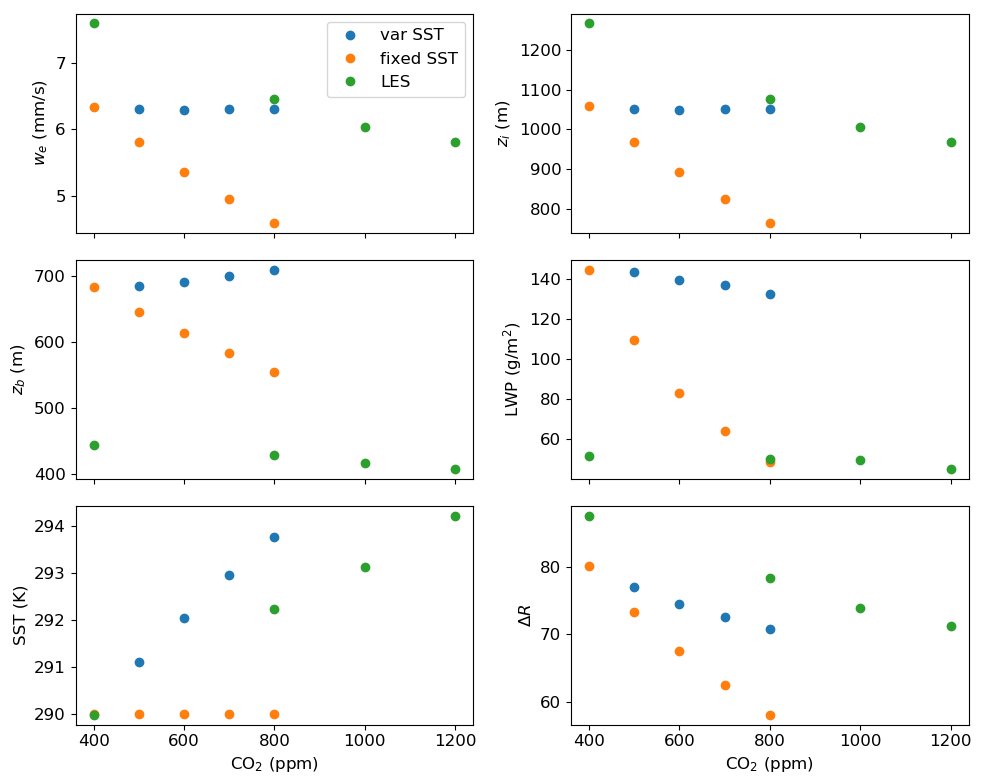

In [114]:
compare(out400, out, out_fixSST, exppath)
# compare("zb", out400, out, out_fixSST, exppath)
# compare("lwp", out400, out, out_fixSST, exppath)
# compare("we", out400, out, out_fixSST, exppath)